# Control of a reaction wheel

Import modules and configure the notebook.

In [1]:
# This module is part of the python standard library
import time

# These modules are part of other existing libraries
import numpy as np
import matplotlib as mp
import matplotlib.pyplot as plt

# This is my own script (it is an interface to the pybullet simulator)
import ae353_wheel

# I often go back and forth between making changes to my scripts and to
# the notebook in which they are used. One "gotcha" is that notebooks only
# import modules or scripts ONCE. Subsequent imports don't do anything, and
# in particular won't reflect any changes I've made to my scripts. To make
# sure that I'm working with the latest version of my code, I use this bit
# of magic, which forces the notebook to "reload" my script:
import importlib
importlib.reload(ae353_wheel)

<module 'ae353_wheel' from 'C:\\Users\\anshu\\Desktop\\Class Materials\\AE 353 Git\\ae353-sp21\\examples\\day02_wheel\\ae353_wheel.py'>

Create an instance of the robot simulator. This will open a window in which you should see the reaction wheel.

In [ ]:
robot = ae353_wheel.RobotSimulator()

Define the task by choosing a desired joint velocity. Then, define a controller - that is, a function that maps a sensor measurement (the joint velocity `v`) to an actuator command (the joint torque `tau`).

In [11]:
# Choose a desired joint velocity (rad / s)
v_des = 5.

# Define a controller (by default, it chooses zero torque)
def controller(q, v):
    tau = -0.7*(v-v_des)
    return tau

Run the simulation. It is a loop. At each iteration, we:
* get a sensor measurement
* choose an actuator command
* go forward one time step

We also log data so that we can plot it later, if we want.

In [12]:
# Restore the simulation to its initial state
robot.reset()

# Choose how long we want to run the simulation, and
# compute the corresponding number of time steps
run_time = 5.
num_steps = int(run_time/robot.dt)

# Create a dictionary in which to store results
data = {
    't': np.empty(num_steps, dtype=float),
    'q': np.empty(num_steps, dtype=float),
    'v': np.empty(num_steps, dtype=float),
    'tau': np.empty(num_steps, dtype=float),
}

# Run the simulation loop
for step in range(num_steps):
    # Get the current time
    t = robot.dt * step
    
    # Get the sensor measurements
    q, v = robot.get_sensor_measurements()
    
    # Choose the actuator command (by running the controller)
    tau = controller(q, v)
    
    # Log the data from this time step
    data['t'][step] = t
    data['q'][step] = q
    data['v'][step] = v
    data['tau'][step] = tau
    
    # Send the actuator commands to robot and go forward one time
    # step (this is where the actual simulation happens)
    robot.set_actuator_commands(tau)
    robot.step()

Plot the results.

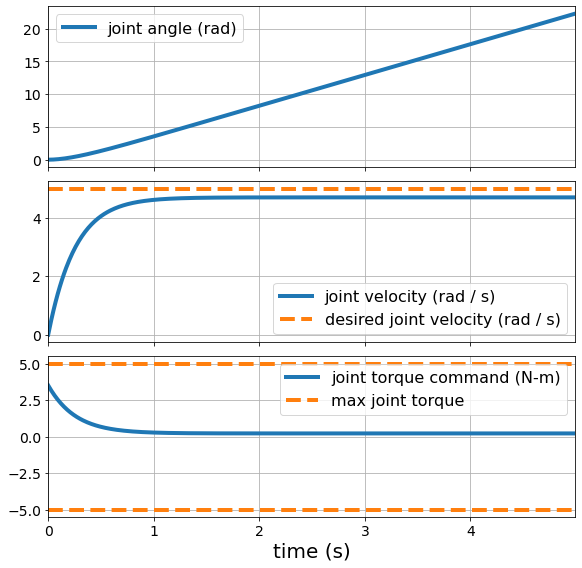

In [13]:
# Create a figure with three subplots, all of which share the same x-axis
fig, ax = plt.subplots(3, 1, figsize=(8, 8), sharex=True)

# Plot joint angle on first subplot
ax[0].plot(data['t'], data['q'], label='joint angle (rad)', linewidth=4)
ax[0].grid()
ax[0].legend(fontsize=16)
ax[0].tick_params(labelsize=14)

# Plot joint velocity on second subplot
ax[1].plot(data['t'], data['v'], label='joint velocity (rad / s)', linewidth=4)
ax[1].plot(data['t'], np.ones_like(data['t']) * v_des, '--', label='desired joint velocity (rad / s)', linewidth=4)
ax[1].grid()
ax[1].legend(fontsize=16)
ax[1].tick_params(labelsize=14)

# Plot joint torque on third subplot
ax[2].plot(data['t'], data['tau'], label='joint torque command (N-m)', linewidth=4)
ax[2].plot(data['t'], np.ones_like(data['t']) * robot.tau_max, '--', label='max joint torque', linewidth=4, color='C1')
ax[2].plot(data['t'], -np.ones_like(data['t']) * robot.tau_max, '--', linewidth=4, color='C1')
ax[2].grid()
ax[2].legend(fontsize=16)
ax[2].tick_params(labelsize=14)

# Set x-axis properties (only need to do this on the third
# subplot since all three subplots share the same x-axis)
ax[2].set_xlabel('time (s)', fontsize=20)
ax[2].set_xlim([data['t'][0], data['t'][-1]])

# Make the arrangement of subplots look nice
fig.tight_layout()